In [29]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("./data/train.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


<AxesSubplot:xlabel='price', ylabel='Count'>

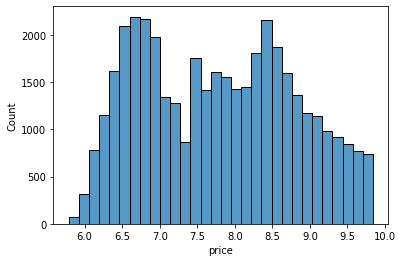

In [4]:
#lets take a look how the histogram looks like
sns.histplot(df["price"], bins=30)

In [5]:
#lets check now the nulls
df.isnull().sum()


id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
#and the types
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [7]:
#We can seee therer are some objects, so lets take a look into them

In [8]:
df.color.unique()

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [9]:
#After a quick search in google we have checked which values are the most and less important


In [10]:
# The color is a categorical column and it the diffeent values have a natural order
color_dic = {
    "D": 1,
    "E": 2,
    "F": 3,
    "G": 4,
    "H": 5,
    "I": 6,
    "J": 7,
    
}

In [11]:
# Now we use map to change the categorical values of the column color with our numbers
df.color = df.color.map(color_dic)

In [12]:
#Same with clarity
df.clarity.unique()

array(['SI2', 'VVS2', 'VS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [13]:
clarity_dic = {
    "IF":   1,
    "VVS1": 2,
    "VVS2": 3,
    "VS1":  4,
    "VS2":  5,
    "SI1":  6,
    "SI2":  7,
    "I1":   8,
    
}

In [14]:
# Con un map reemplazamos todas las strings de la columna Deck por el valor asignado en el diccionario
df.clarity = df.clarity.map(clarity_dic)

In [15]:
df.cut.unique()

array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

In [16]:
#And same with columnd cut
cut_dic = {
    "Premium":   1,
    "Ideal": 2,
    "Very Good": 3,
    "Fair":  4,
    "Good":  5,
}

In [17]:
df.cut = df.cut.map(cut_dic)

In [18]:
#lets see the correlation matrix for price
#I hae checked this matrix many time, every time I was changing droping and adding new columns
df.corr()["price"]

id        -0.003194
carat      0.920064
cut       -0.009901
color      0.157426
clarity    0.213649
depth     -0.003292
table      0.162804
x          0.957668
y          0.928909
z          0.930014
price      1.000000
Name: price, dtype: float64

<AxesSubplot:>

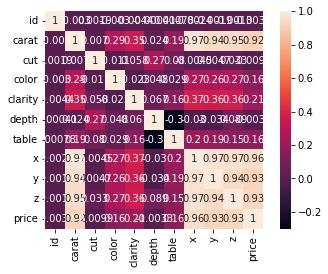

In [20]:
#Same with this matrix, checking it in every change
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [21]:
#Here we are with my last manipulation of columns
#I did it kind of randomly and this ones were the one with the best results

df["clar_color"] =(df.clarity*df.color)
df["table_color"] =(df.table*df.cut)
df["table_clarity"] =(df.table*df.clarity)
df["table_/_clarity"] =(df.table/df.clarity)
df["table_clarity_cut"] =(df.table*df.clarity*df.cut)
df["x*y*z"] = (df.x*df.y*df.z)
df["x_/_y"] = (df.x/df.y)
df["x_/_z"] = (df.y/df.z)
df ["all"] = df.carat*df.cut*df.color*df.depth*df.table*df.x*df.y*df.z/7

In [22]:
# Because in my testing I was dividing by some columns, I had to check if they have
# any 0 value

In [23]:
df = df[((df['x'] != 0) & (df['y'] != 0)) & (df['z'] != 0)  & (df['table'] != 0)  & (df['cut'] != 0)]

In [24]:
#lets see the shape 
df.shape

(40438, 20)

In [25]:
#and the head
#df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price,clar_color,table_color,table_clarity,table_/_clarity,table_clarity_cut,x*y*z,x_/_y,x_/_z,all
0,0,0.30,1,1,7,62.4,58.0,4.31,4.28,2.68,6.353,7,58.0,406.0,8.285714,406.0,49.437424,1.007009,1.597015,7668.168212
1,1,1.01,2,2,3,62.7,56.0,6.42,6.46,4.04,9.183,6,112.0,168.0,18.666667,336.0,167.551728,0.993808,1.599010,339537.544930


In [26]:
# Here is where we are creating our X and y
# We drop price and id 
X = df.drop('price', 1)
X = X.drop("id",1)

# After droping various correlated features, these ones where the ones that gaving
# me the best results.
X = X.drop("x",1)
X = X.drop("y",1)
X = X.drop("z",1)
y = df["price"]

<ipython-input-26-0b1bca259dea>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('price', 1)
<ipython-input-26-0b1bca259dea>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop("id",1)
<ipython-input-26-0b1bca259dea>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop("x",1)
<ipython-input-26-0b1bca259dea>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop("y",1)
<ipython-input-26-0b1bca259dea>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop("z",1)


In [30]:
#lets do the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


In [31]:
# Our first try was win a DecisionTreeRegressor

In [32]:
tree = DecisionTreeRegressor(max_depth=10, random_state=666)

In [33]:
# training the tree
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=666)

In [34]:
# Prediction from our train set
y_train_pred = tree.predict(X_train)

In [35]:
#And we have a decent 0.092
metrics.mean_squared_error(y_train, y_train_pred )**0.5

0.09254835551394557

In [36]:
# Prediction from our test set 0.11
y_test_pred = tree.predict(X_test)

In [37]:
# And we get a not abd 
metrics.mean_squared_error(y_test, y_test_pred ) **0.5

0.10892318402116676

In [42]:
#I have been tunning these hyperparameters for while,
# and I did Grid and random searching
#Hiperparámetros tuneables de RandomForest

parameters = {
 'bootstrap': [True, False],   
 'max_depth': [None, 50,70,100],
 'max_features': [7,8], 
 'min_samples_split': [ 2, 70,130],
 'n_estimators': [150, 200,300 ]}





In [38]:
#Grid search preparation
from sklearn.model_selection import GridSearchCV
rfc = RandomForestRegressor()
grid = GridSearchCV(rfc, parameters, verbose=1, cv =3)

In [ ]:
# I have executed this code, but I Have commented because I don't want to executed by mistake
#because it is a very slow process

##grid.fit(X_train,y_train)

In [43]:
#Random search preparation
from sklearn.model_selection import RandomizedSearchCV
rf_best = RandomForestRegressor()
rgs = RandomizedSearchCV(rf_best, parameters, cv=3,  random_state=666)

In [41]:
# I have executed this code, but I Have commented because I don't want to executed by mistake
#because it is a very slow process

#rgs.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features=7,
                                                   n_estimators=200,
                                                   random_state=666),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 50, 70, 100],
                                        'max_features': [7, 8],
                                        'min_samples_split': [2, 70, 130],
                                        'n_estimators': [150, 200, 300]},
                   random_state=666)

In [35]:
# This one was my best stimator but I kept changing the parameter a littel bit
rgs.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=200, random_state=666)

In [44]:
rf_best = RandomForestRegressor( max_features=7, n_estimators=600,  random_state=666)
rf_best.fit(X_train,y_train)

RandomForestRegressor(max_features=7, n_estimators=600, random_state=666)

In [45]:
#this one gave me the best results
y_rf_best_train_predict = rf_best.predict(X_train)
metrics.mean_squared_error(y_train, y_rf_best_train_predict ) **0.5

0.03161891598230233

In [46]:
# And this is the best predcction from the test 
y_rf_test_predict = rf_best.predict(X_test)
metrics.mean_squared_error(y_test, y_rf_test_predict ) **0.5

0.0835953831006302

In [ ]:
# this is just for keepen track of the different results
# 0.0835953831006302


In [ ]:
# Im not goint to execute this, because it is just a test to let me know the predctions
# made sense

for i,j in zip(y_test,y_rf_test_predict):
    print(i,j)

In [47]:
# I wanted to have an idea about what was my R2 score
metrics.r2_score(y_test, y_rf_test_predict )

0.9932703855460613

In [ ]:
#now i will train with the whole data set

In [ ]:
#We train with all data set to have the best trained model

In [48]:
rf_best = RandomForestRegressor( max_features=7, n_estimators=700,  random_state=666)
rf_best.fit(X,y)

RandomForestRegressor(max_features=7, n_estimators=700, random_state=666)

In [49]:
y_rf_best_train_predict = rf_best.predict(X)
metrics.mean_squared_error(y_test, y_rf_test_predict ) **0.5

0.0835953831006302

In [50]:
#Lpading the test csv
df = pd.read_csv("./data/test.csv")
df.shape

(13485, 10)

In [51]:
# We need to modify the categorical columns as we did in our dataset

df.cut = df.cut.map(cut_dic)
df.clarity = df.clarity.map(clarity_dic)
df.color = df.color.map(color_dic)

In [52]:
#checking if we have zeros

df[((df['x'] == 0) | (df['y'] == 0)) | (df['z'] == 0)  | (df['table'] == 0)  | (df['cut'] == 0)]

,id,carat,cut,color,clarity,depth,table,x,y,z
8786,8786,1.14,4,4,4,57.5,67.0,0.00,0.00,0.0
8876,8876,1.15,2,4,5,59.2,56.0,6.88,6.83,0.0
10219,10219,1.00,1,4,7,59.1,59.0,6.55,6.48,0.0


In [53]:
#We have some zeros and we cant drop the rows becuase we need to upload the complete csv
#So we are going to look up similar rows on the dataset so that we can change the zeros
#for kind of correct value 

#8786 row

#The most similar to our 8786 in size is
df[((df.depth>57) & (df.depth<58) &(df.table>66.0)&(df.table<69.0) )]

,id,carat,cut,color,clarity,depth,table,x,y,z
8267,8267,0.90,4,2,7,57.5,68.0,6.37,6.33,3.65
8786,8786,1.14,4,4,4,57.5,67.0,0.00,0.00,0.00


In [54]:
# we have considered these are the better values 
df.at[8786,"x"]  = 6.37
df.at[8786,"y"]  = 6.33
df.at[8786,"z"]  = 3.65

In [55]:
# Now is the turn of the row 

#8876

df[((df.depth==59.2) &(df.table==56)  )]


,id,carat,cut,color,clarity,depth,table,x,y,z
7661,7661,0.51,2,3,5,59.2,56.0,5.23,5.18,3.08
8876,8876,1.15,2,4,5,59.2,56.0,6.88,6.83,0.00
9057,9057,1.02,3,2,6,59.2,56.0,6.57,6.63,3.91


In [56]:
df.at[8876,"z"]  = 3.91

In [57]:
# The last but not the least , the row 
# 10219

df[((df.depth==59.1) &(df.table==59) &(df.y>6.47) &(df.y<6.52) )]

,id,carat,cut,color,clarity,depth,table,x,y,z
3338,3338,1.01,1,3,6,59.1,59.0,6.56,6.50,3.86
7872,7872,1.00,1,2,4,59.1,59.0,6.56,6.51,3.86
10219,10219,1.00,1,4,7,59.1,59.0,6.55,6.48,0.00


In [58]:
df.at[10219,"z"]  = 3.86

In [59]:
# Everything is ready now for the new columns and its divisions

In [60]:
df["clar_color"] =(df.clarity*df.color)
df["table_color"] =(df.table*df.cut)
df["table_clarity"] =(df.table*df.clarity)
df["table_/_clarity"] =(df.table/df.clarity)
df["table_clarity_cut"] =(df.table*df.clarity*df.cut)
df["x*y*z"] = (df.x*df.y*df.z)
df["x_/_y"] = (df.x/df.y)
df["x_/_z"] = (df.y/df.z)
df ["all"] = df.carat*df.cut*df.color*df.depth*df.table*df.x*df.y*df.z/7


In [61]:
#a quick look of our X
X.head(2)

,carat,cut,color,clarity,depth,table,clar_color,table_color,table_clarity,table_/_clarity,table_clarity_cut,x*y*z,x_/_y,x_/_z,all
0,0.30,1,1,7,62.4,58.0,7,58.0,406.0,8.285714,406.0,49.437424,1.007009,1.597015,7668.168212
1,1.01,2,2,3,62.7,56.0,6,112.0,168.0,18.666667,336.0,167.551728,0.993808,1.599010,339537.544930


In [62]:
# we need to do the sames drops that we did in our initial dataset
X_final = df.drop("id", 1)
X_final = X_final.drop("x",1)
X_final = X_final.drop("y",1)
X_final = X_final.drop("z",1)


<ipython-input-62-206c44e51219>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_final = df.drop("id", 1)
<ipython-input-62-206c44e51219>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_final = X_final.drop("x",1)
<ipython-input-62-206c44e51219>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_final = X_final.drop("y",1)
<ipython-input-62-206c44e51219>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_final = X_final.drop("z",1)


In [63]:
#We do the prediction of our X_final
y_test_pred = rf_best.predict(X_final)

In [64]:
# quick look to the first predicted values
y_test_pred[0:5]

array([6.06679714, 8.56021857, 9.49650571, 7.81630429, 8.96070643])

In [65]:
# We load the submision csv and we assign our predictions to the price columns 
submi = pd.read_csv("./data/sample_submission.csv")
submi["price"] = y_test_pred


In [66]:
# we save our new csv, and we are ready for the competition 
submi.to_csv('submi6.csv', index = False)